In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import statsmodels.api as sm

In [108]:
dane_leki = pd.read_excel('dane_leki.xlsx')
dane_leki = dane_leki.drop("Unnamed: 0",axis=1)


In [109]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


In [110]:
correla  = dane_leki.corr()
correla 

C:\Users\Michał\AppData\Local\Temp\ipykernel_16976\34077217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correla  = dane_leki.corr()


,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logK HSA,1.000000,0.799757,-0.720084,0.598914,-0.306897
logKCTAB,0.799757,1.000000,-0.633481,0.446144,-0.135951
CATS3D_00_DD,-0.720084,-0.633481,1.000000,-0.291248,0.290864
CATS3D_09_AL,0.598914,0.446144,-0.291248,1.000000,0.326375
CATS3D_00_AA,-0.306897,-0.135951,0.290864,0.326375,1.000000


CORRELATION 

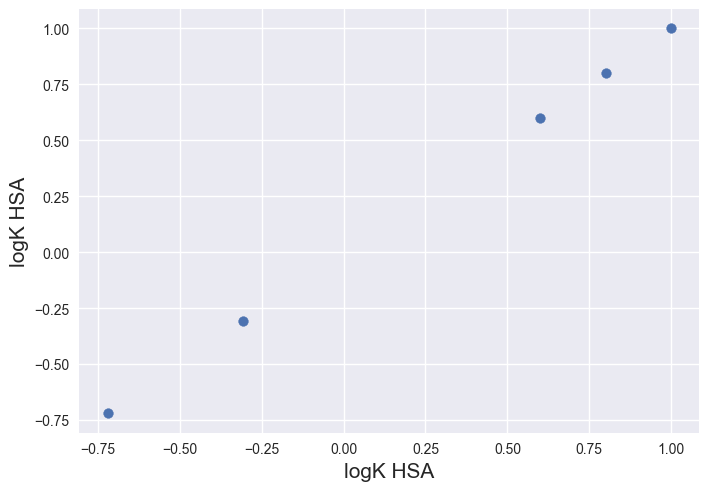

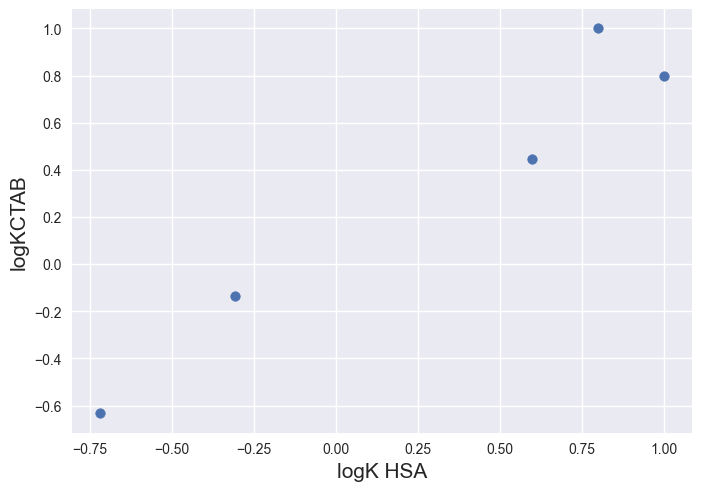

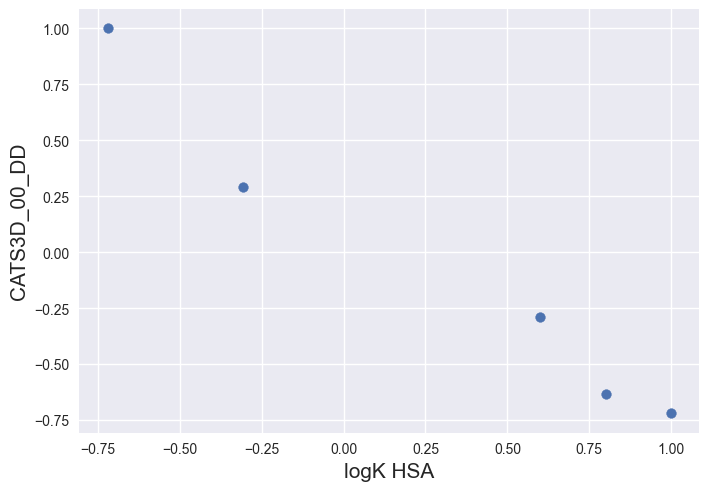

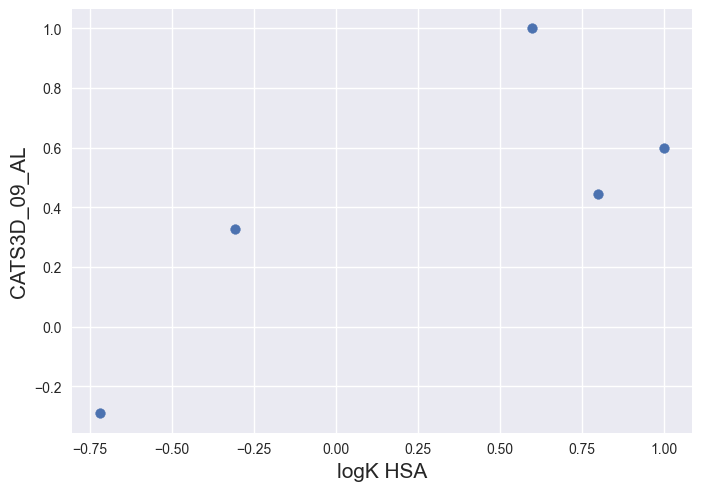

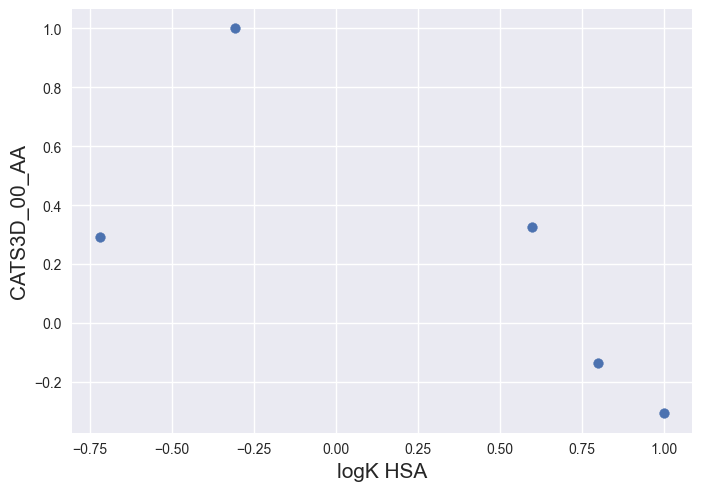

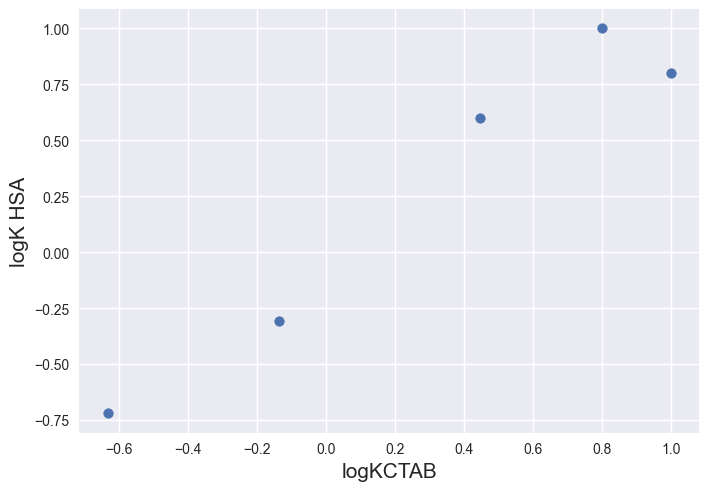

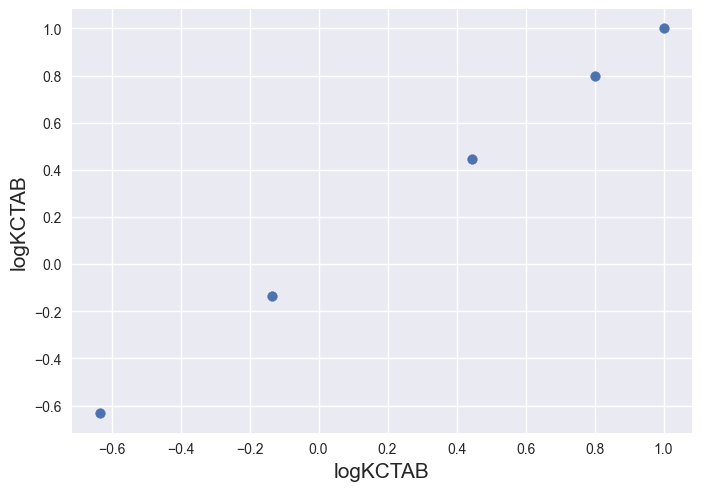

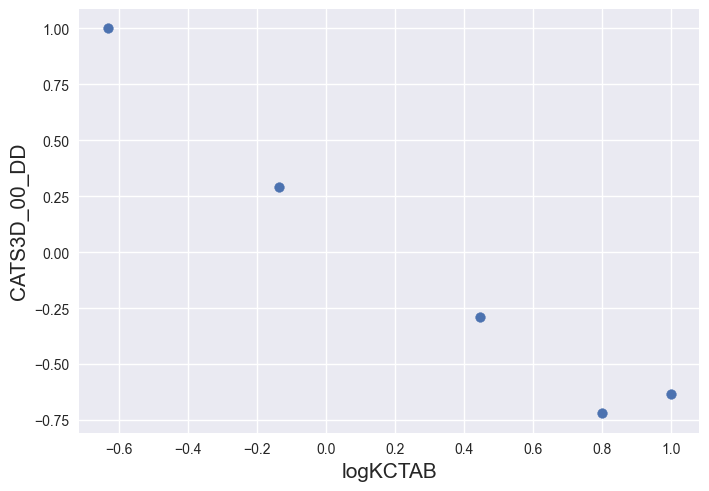

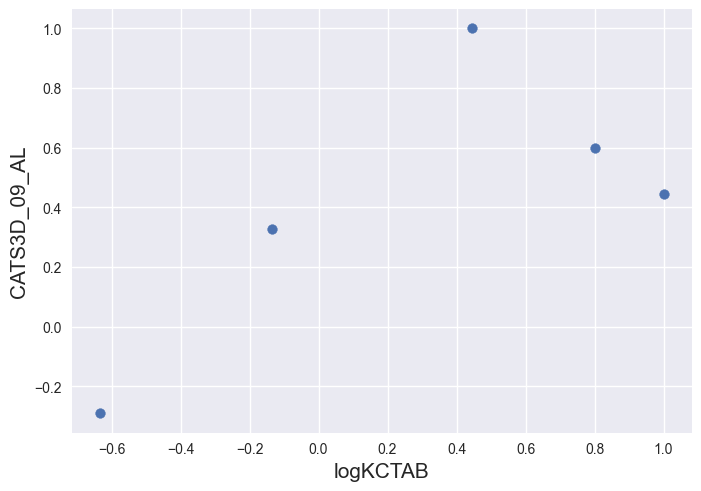

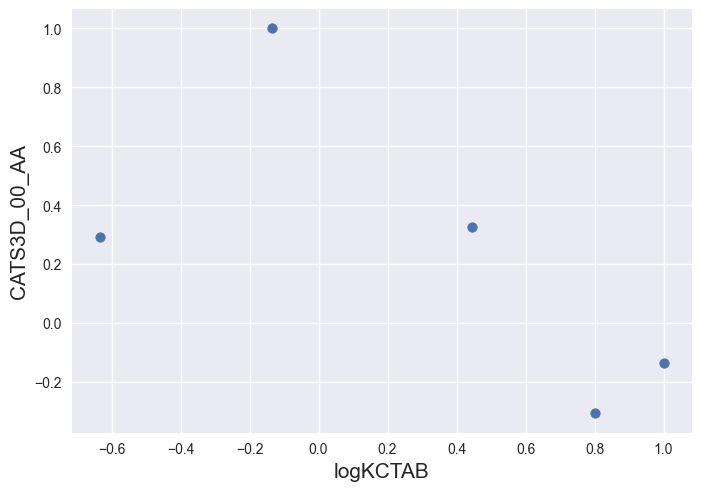

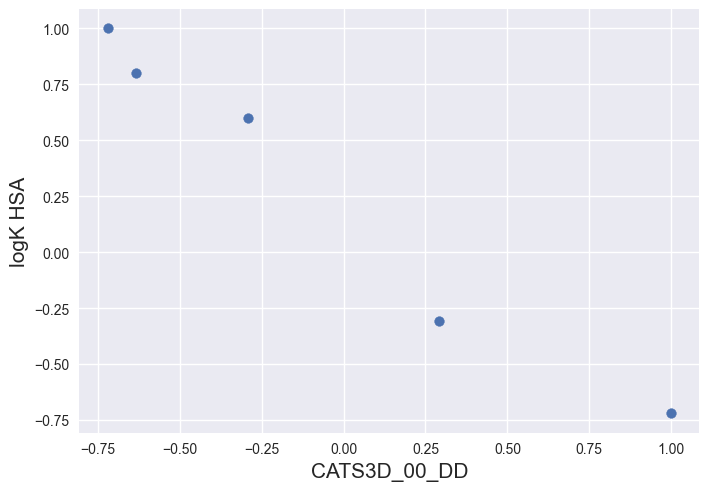

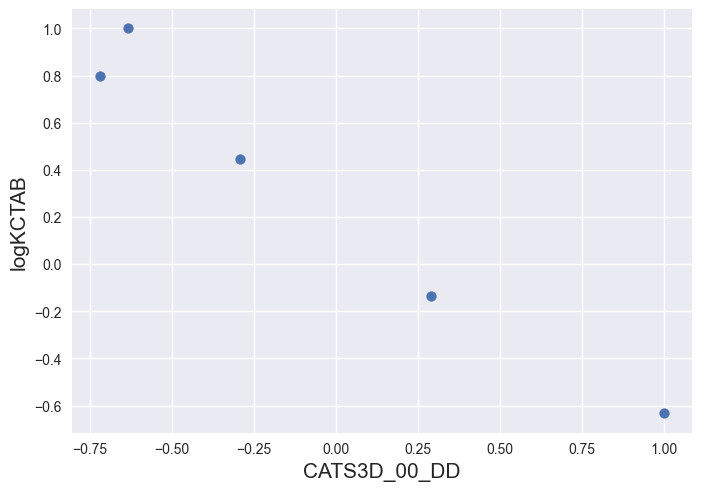

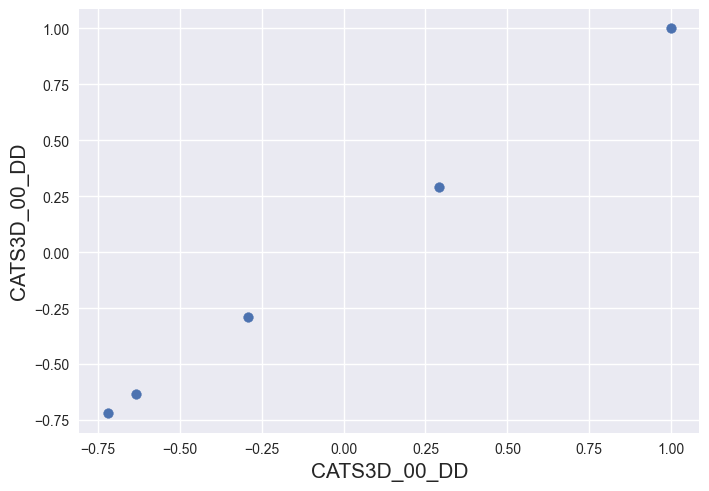

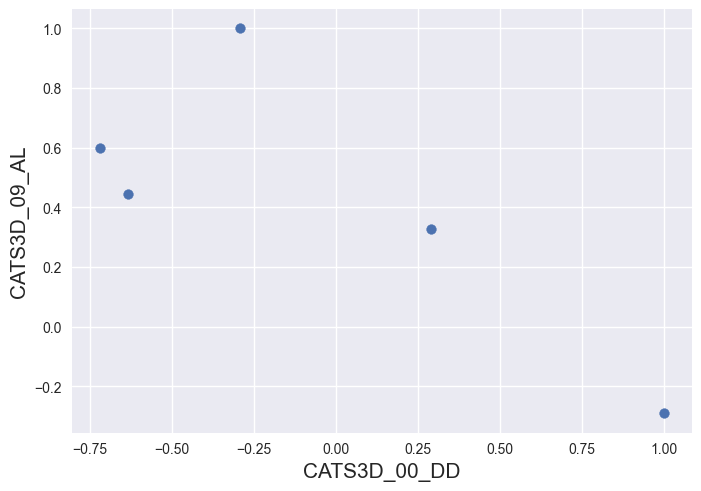

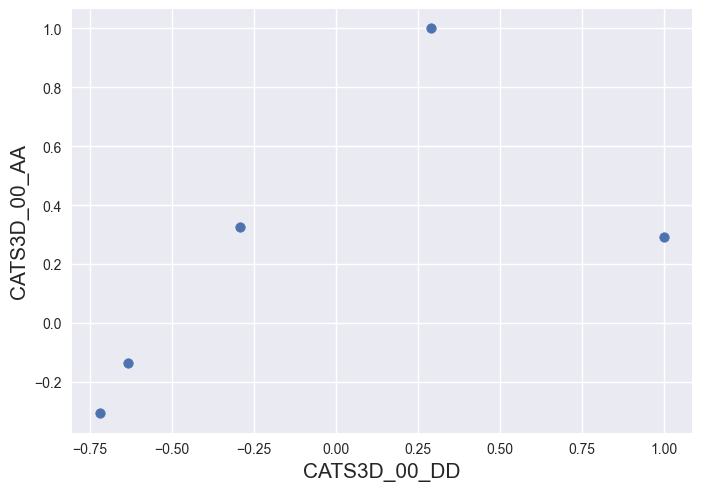

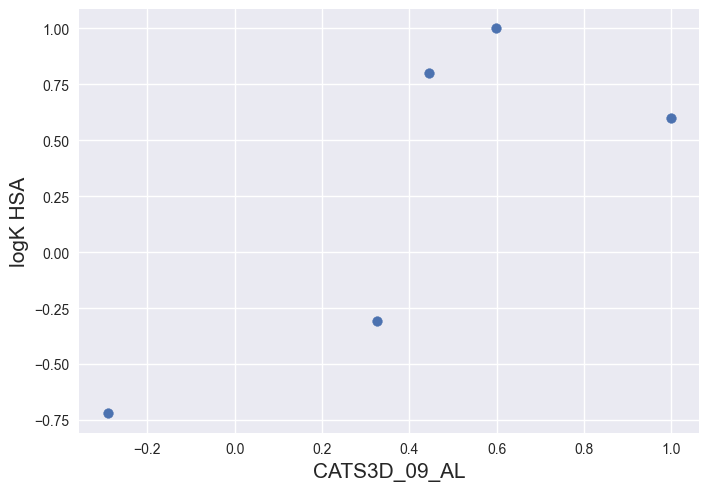

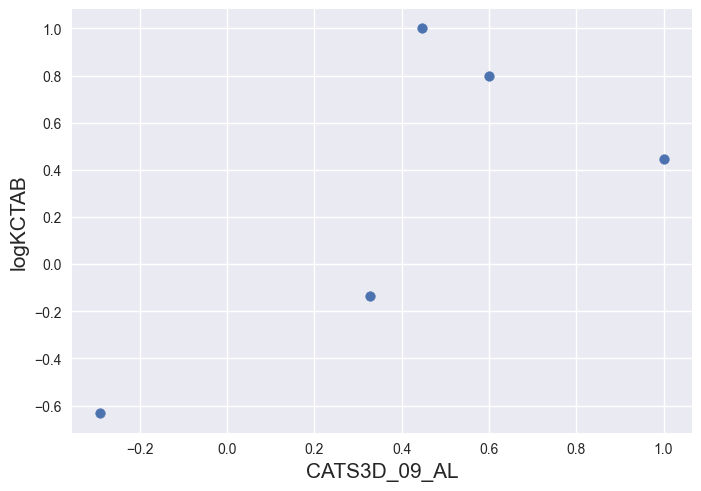

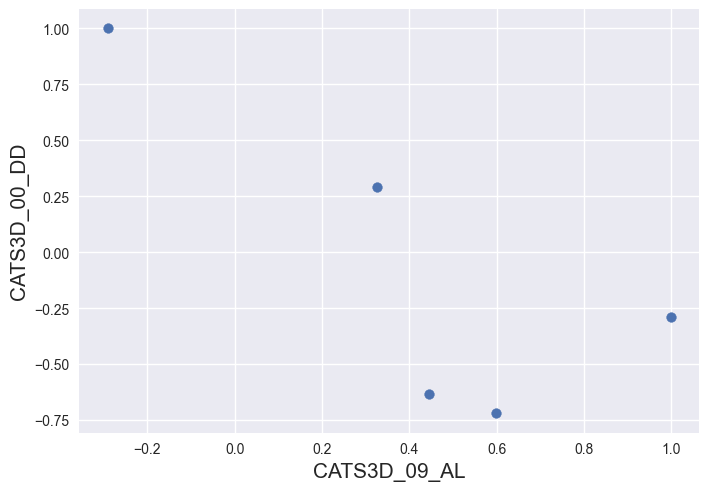

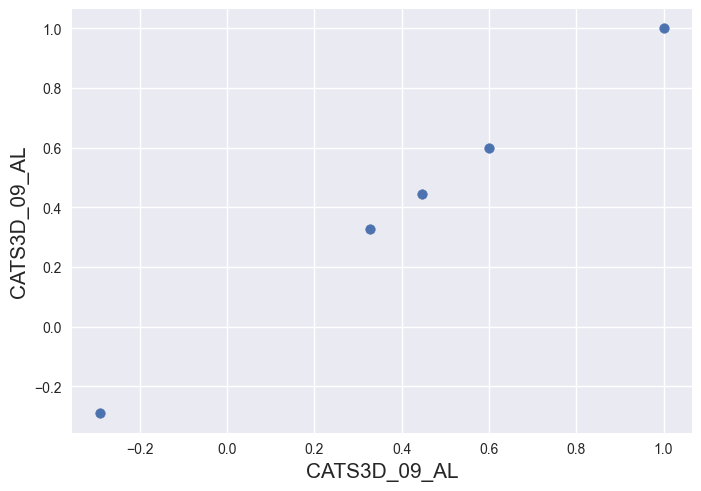

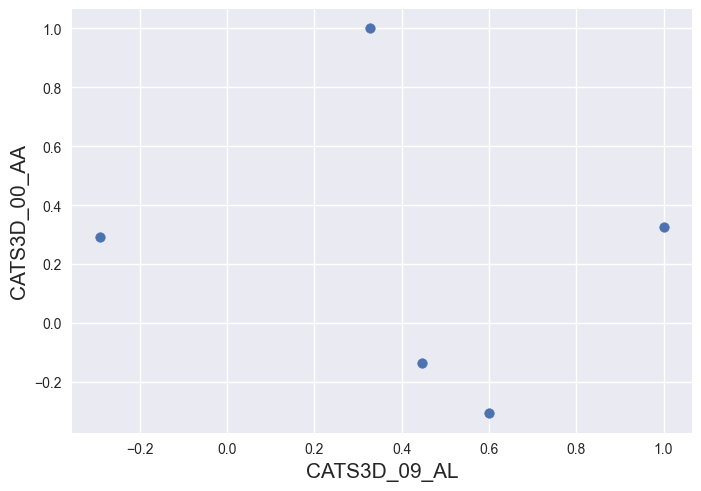

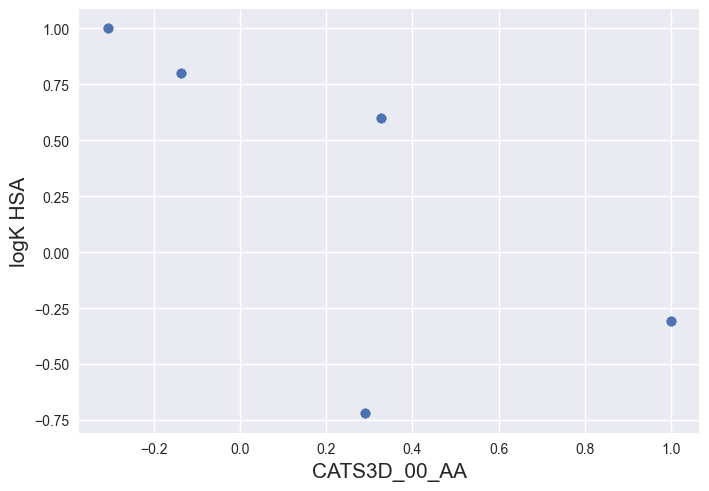

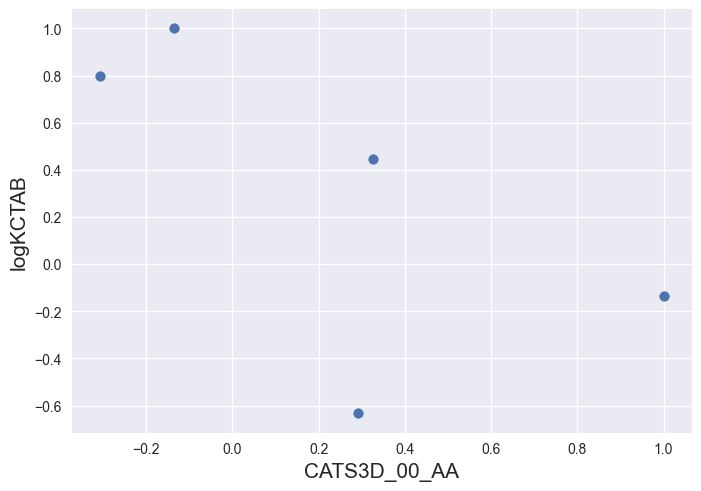

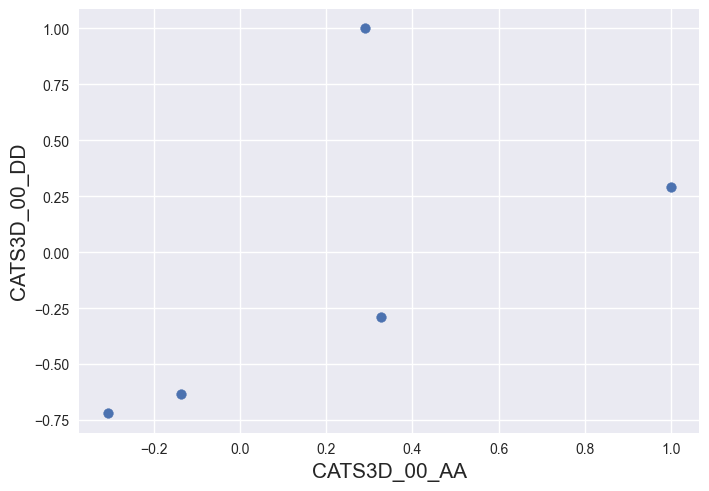

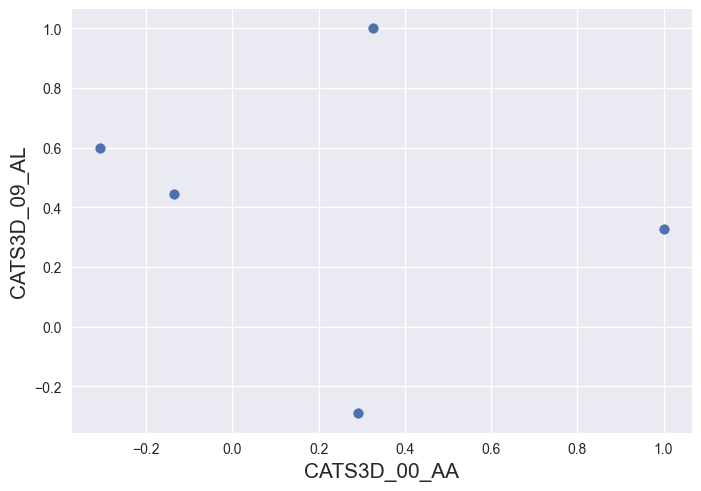

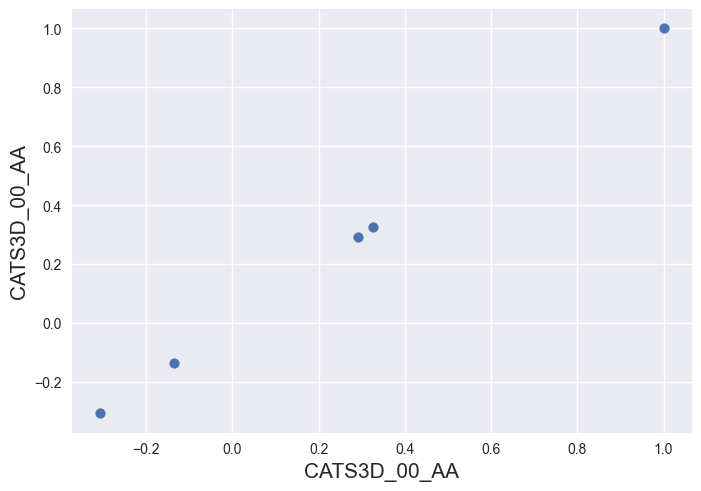

In [111]:
list_of_names = list(correla)
for col_name in list_of_names:
    for i,col_name_y in enumerate(list_of_names):
        x = correla.get(col_name) 
        y = correla.iloc[i]
        plt.scatter(x,y)
        plt.xlabel(col_name)
        plt.ylabel(col_name_y)
        plt.show()


HEATMAP

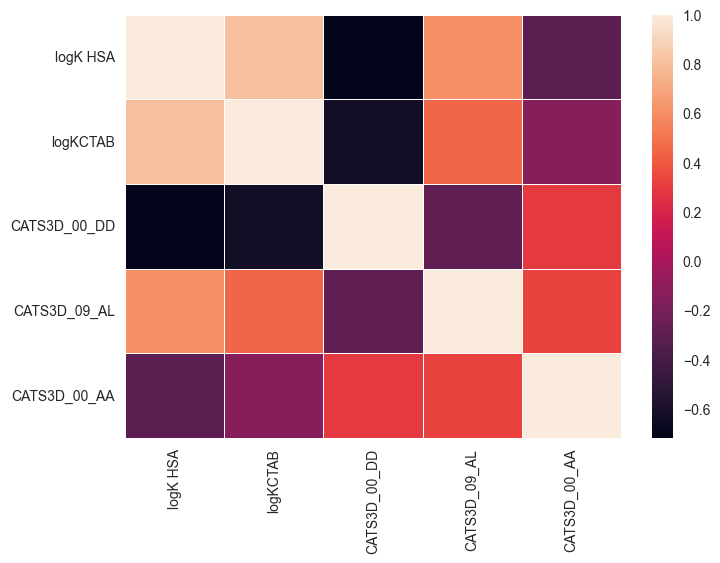

In [112]:
ax = sns.heatmap(correla, linewidth=0.5)
plt.show()

RÓWNANIE MODELU 

In [113]:
treningowe = dane_leki[dane_leki['Zbiór']=='t']

In [114]:
treningowe.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


R^2

In [115]:
X = pd.DataFrame(treningowe[['logKCTAB','CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']])
Y = pd.DataFrame(treningowe['logK HSA'])
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())


                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     14.23
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           7.72e-05
Time:                        17:18:55   Log-Likelihood:                -10.796
No. Observations:                  19   AIC:                             31.59
Df Residuals:                      14   BIC:                             36.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8050      0.421      1.914   

C:\Users\Michał\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


RÓWNANIE MODELU

równanie_modelu=0.8050+0.4722*logKCTAB +(-0.2161 )*CATS3D_00_DD+0.3232 *CATS3D_09_AL+-0.2253*CATS3D_00_AA

In [116]:
y_pred = 0.8050 + 0.4722*dane_leki['logKCTAB'] + (-0.2161 * dane_leki['CATS3D_00_DD']+0.3232*dane_leki['CATS3D_09_AL']+ (-0.2253*dane_leki['CATS3D_00_AA']))
y_pred
dane_leki['y_pred'] = y_pred
dane_leki

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór,y_pred
0,acetaminophen,-0.79,-0.63,2,0,2,t,-0.375286
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t,0.263784
2,bromazepam,0.38,0.57,1,0,3,t,0.182154
3,carbamazepine,0.69,0.68,0,0,3,t,0.450196
4,chlorpromazine,1.18,1.50,0,0,2,t,1.062700
5,clonidine,-0.42,0.26,2,0,1,t,0.270272
6,diazepam,1.08,1.25,0,0,3,t,0.719350
7,diltiazem,0.06,1.09,0,3,6,t,0.937498
8,diphenhydramine,0.08,0.46,0,0,2,t,0.571612
9,fluoxetine,1.39,0.73,1,0,1,t,0.708306


RMSE_c - treningowy


In [117]:
logKHSA = dane_leki['logK HSA']
MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='t'],y_pred[dane_leki['Zbiór'] == 't'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4271069323369919


RMSE_ex - testowy 

In [118]:
logKHSA = dane_leki['logK HSA']
MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='w'],y_pred[dane_leki['Zbiór'] == 'w'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.30141347956420267


Q_2ex


In [119]:
def Q_2():
    y_pred_w = y_pred[dane_leki['Zbiór']=='w']
    mean_pred = y_pred_w.mean()
    licznik__ = y_pred_w[dane_leki['Zbiór']=='w'] - logKHSA[dane_leki['Zbiór']=='w']
    licznik = sum(licznik__**2)
    mianownik__ = y_pred_w - mean_pred
    mianownik = sum(mianownik__**2)
    return 1 - (licznik / mianownik)

In [120]:
Q_2()

0.9489689299070292

WYKRES WILLIAMSA

In [121]:
h = (3*4 + 1) / 19 # bo ze zbioru t
h

0.6842105263157895

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

C:\Users\Michał\AppData\Local\Temp\ipykernel_16976\3323564304.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # pretty matplotlib plots


In [123]:
X_ols = treningowe[["logKCTAB","CATS3D_00_DD",'CATS3D_09_AL','CATS3D_00_AA']]
Y_ols = treningowe[['logK HSA']] 

In [124]:
X = X_ols
y = Y_ols


# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [125]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     14.23
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           7.72e-05
Time:                        17:18:55   Log-Likelihood:                -10.796
No. Observations:                  19   AIC:                             31.59
Df Residuals:                      14   BIC:                             36.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8050      0.421      1.914   

C:\Users\Michał\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [126]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
# plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
#                           lowess=True,
#                           scatter_kws={'alpha': 0.5},
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

IndexError: list index out of range

<Figure size 800x550 with 0 Axes>

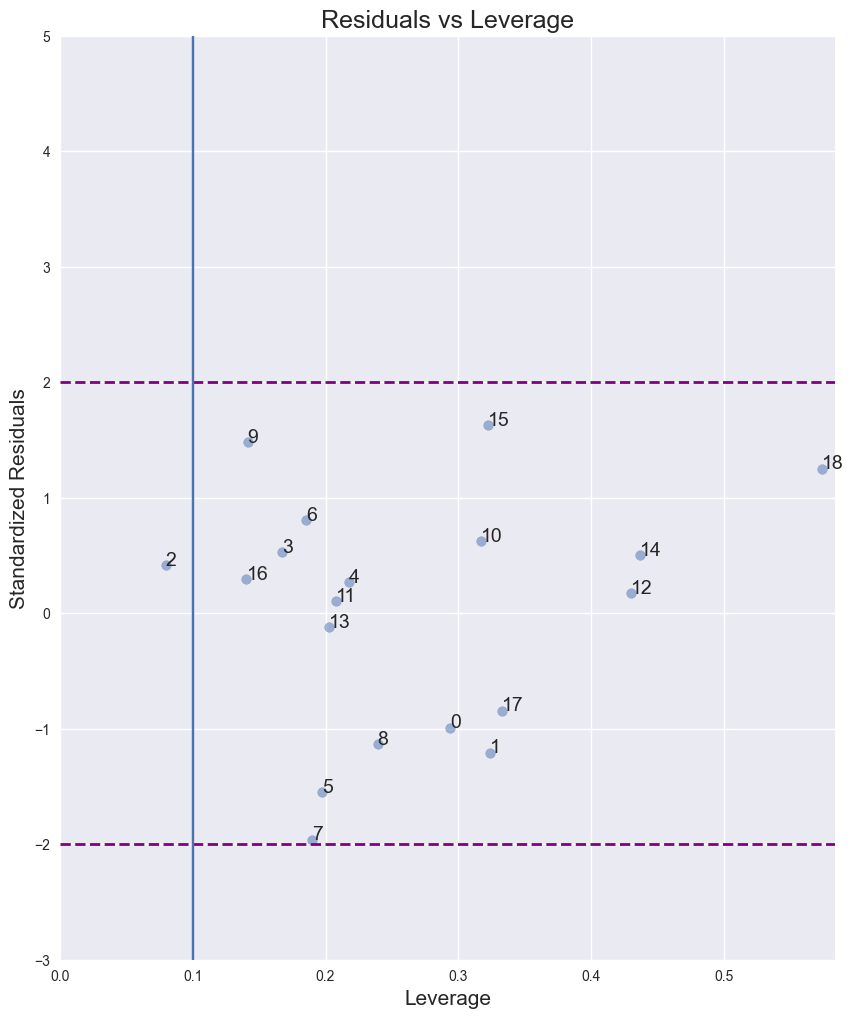

In [137]:
xs = np.linspace(1, 21, 200)
plot_lm_4 = plt.figure(figsize=(10,12))
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
plt.hlines(y=[-2, 0, -2], xmin=[0, 25, 50], xmax=[len(xs)], colors='purple', linestyles='--', lw=2, label='Multiple Lines')
plt.hlines(y=[2, 0, -2], xmin=[0, 25, 50], xmax=[len(xs)], colors='purple', linestyles='--', lw=2, label='Multiple Lines')
plt.axvline(x=0.1)
#sns.regplot(model_leverage, model_norm_residuals,
#            scatter=False,
#            ci=False,
#            lowess=True,
#            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage = np.flip(np.argsort(model_cooks), 0)[:]
for i in leverage:
    plot_lm_4.axes[0].annotate(i,
                               xy=(model_leverage[i],
                                   model_norm_residuals[i]));